<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download Some Data Related to GDP per capita and life expectancy


### Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]

We decided that we only wanted to use data from one year, since subsequent years would be similar and we did not want to clutter the plot. Furthermore we assumed that each country would have a similar GDP / Life expectancy ratio and thus it would be sufficient to plot only one point per country to see a trend. Plotting the same country multiple times would make it hard to compare them to each other, which seemed to be useful in order to answer the later questions.

We took data from only 2015, since we had the most data from that year.

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
ALB,Albania,2015,32826175488,10970.452245,78.025
DZA,Algeria,2015,481546174464,13724.723853,76.090
AGO,Angola,2015,154071351296,6227.664689,59.398
ATG,Antigua and Barbuda,2015,943836736,20154.947488,76.483
ARG,Argentina,2015,712662646784,19116.907915,76.068
...,...,...,...,...,...
UZB,Uzbekistan,2015,283167719424,5700.236028,70.928
VNM,Vietnam,2015,511142723584,5554.858056,75.110
YEM,Yemen,2015,67136618496,2308.636584,66.085


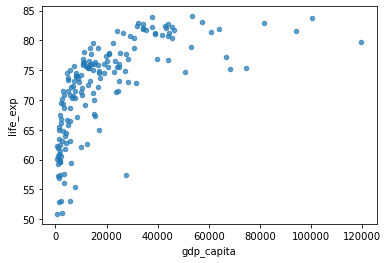

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


GdpPerCap = pd.read_csv("gdp-per-capita-worldbank.csv")
LifeExpect = pd.read_csv("life-expectancy.csv")
NatGdp = pd.read_csv("national-gdp.csv")

countries = NatGdp.merge(GdpPerCap, on=["Entity", "Code", "Year"]).merge(LifeExpect, on=["Entity", "Code", "Year"])
countries = countries[countries.Year == 2015]

countries = countries.set_index("Code")
countries.columns= ["country","year","gdp","gdp_capita", "life_exp"]

countries.plot.scatter(x="gdp_capita",y="life_exp",logx=True, alpha=0.7)

countries

### Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]


The trend seems to be a logarithmic curve with a few outliers. In a richer country the life expectancy increases, which makes sense. If we assume a richer country has a higher GDP per Capita the people in that country should be able to afford all their basic needs and as such avoid starvation and health deficits related to bad hygien and similar things. Further wealth contributes to health care and medicine, but after a certain point there is a diminishing return on how much wealth impacts the life expectancy.

Almost all outliers are a result of the country being pretty poor and then finding oil, resulting in a huge boost in the economy, which has not had the time needed to positively affect the public health. Furthermore the wealth is probably not distributed properly, since the people owning oil is probably just a small percentage of the population.

### Data Cleaning and Why?
* Om inte data från 2015
* Länder som inte har data punkter för alla columner
* Medelvärdes entries, ex. World fanns med


,year,gdp,gdp_capita,life_exp
count,169.0,1.690000e+02,169.000000,169.000000
mean,2015.0,6.111879e+11,19302.840668,72.017568
std,0.0,2.013399e+12,20548.162315,8.031316
min,2015.0,5.792709e+08,621.569843,50.881000
25%,2015.0,2.312296e+10,4713.499587,66.577000
50%,2015.0,7.244055e+10,12759.816602,74.078000
75%,2015.0,3.806535e+11,27045.713019,77.691000
max,2015.0,1.712686e+13,119749.428536,84.043000


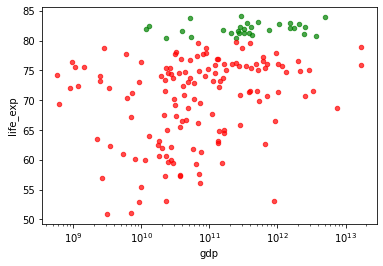

In [11]:
#d
stdevs = countries.std(axis = 0)
means = countries.mean(axis = 0)
highLifeExp = countries[countries.life_exp > stdevs.life_exp + means.life_exp]
lowLifeExp = countries[countries.life_exp <= stdevs.life_exp + means.life_exp]

fig, ax = plt.subplots()
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7,logx=True, ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7,logx=True, ax=ax, color='r')

countries.describe()

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
BRB,Barbados,2015,2807180544,16458.103529,78.801
CYP,Cyprus,2015,23035398144,30549.100970,80.350
ISL,Iceland,2015,13045315584,43048.125145,82.481
MLT,Malta,2015,11749704704,34087.081514,81.896


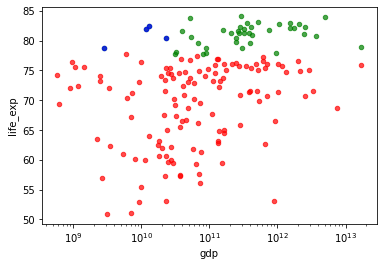

In [30]:
#e
fig, ax = plt.subplots()
highLifeExp = countries[countries.life_exp > countries.life_exp.quantile(0.75)]
lowLifeExp = countries[countries.life_exp <= countries.life_exp.quantile(0.75)]

highLifeExpLowGDP = highLifeExp[highLifeExp.gdp < countries.gdp.quantile(0.25)]
highLifeExpLowGDP #Finns inga länder som har GDP under mean och hög life exp

highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')

highLifeExpLowGDP

#f Se graf finns inte mycket korrelation

,country,year,gdp,gdp_capita,life_exp
Code,,,,,


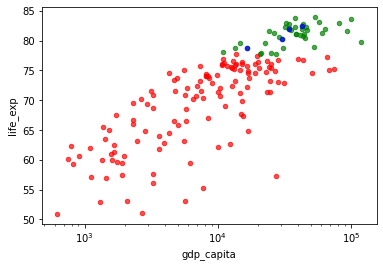

In [31]:
fig, ax = plt.subplots()
highLifeExp = countries[countries.life_exp > countries.life_exp.quantile(0.75)]
lowLifeExp = countries[countries.life_exp <= countries.life_exp.quantile(0.75)]

highLifeExpLowGDPcap = highLifeExp[highLifeExp.gdp_capita < countries.gdp_capita.quantile(0.25)]

highLifeExp.plot.scatter(x="gdp_capita",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')

highLifeExpLowGDPcap

#g ser att de länderna bara var små -> låg gdp men inte låg gdp per capuita, kan se korrelation mellan gdp/cap och life exp med vissa outliers, troligtvis oljeländer 

In [32]:
#happiness - gdp/cpa mot life exp happiness som färg gradient


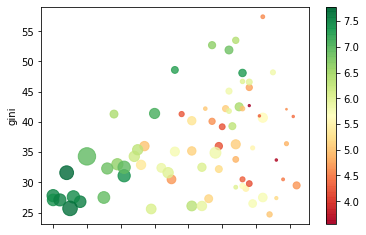

In [88]:
#Kollar 2012 mest data då, income ineq limiting
from sklearn import preprocessing
from math import log

incomeInEq = pd.read_csv("economic-inequality-gini-index.csv")
corruption = pd.read_csv("TI-corruption-perception-index.csv")
gdpCap = pd.read_csv("gdp-per-capita-worldbank.csv")
satisfaction = pd.read_csv("happiness-cantril-ladder.csv")

countries = incomeInEq.merge(corruption).merge(gdpCap).merge(satisfaction).set_index("Code")
countries.columns= ["country","year","gini","corruption","gdp_capita","satisfaction"]

countries = countries[countries.year ==2012]

min_max_scaler = preprocessing.MinMaxScaler()
x = countries[['gdp_capita']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)

countries.gdp_capita = (x_scaled+0.01)*300

countries.corruption = -countries.corruption

countries.plot.scatter(x="corruption", y="gini", s=countries.gdp_capita,c=countries.satisfaction,cmap="RdYlGn", alpha=0.8)